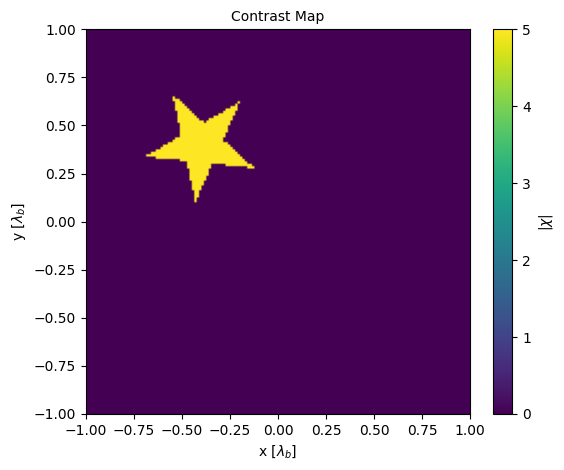

Execution time: 97.25 [sec]


In [1]:
import sys
sys.path.insert(1, '../../../eispy2d/library/')

import configuration as cfg
import inputdata as ipt
import result as rst
import draw
import mom_cg_fft as mom

# Parameters
name = 'single'
file_path = "../../../data/position/single/"
NM = NS = 80
Ro = 4.
lambda_b = 1.
epsilon_rb = 1.
Lx = Ly = 2.
E0 = 1.
perfect_dielectric = True
resolution = (160, 160)
noise = 5.
indicators = [rst.SHAPE_ERROR, rst.POSITION_ERROR, rst.OBJECTIVE_FUNCTION]
epsilon_rd = 6. # 6.00
l = 0.3
position = [.4, -.4]
rotate = 30

config = cfg.Configuration(name=name + '.cfg', number_measurements=NM, 
                           number_sources=NS, observation_radius=Ro, 
                           wavelength=lambda_b,
                           background_permittivity=epsilon_rb,
                           image_size=[Ly, Lx], magnitude=E0,
                           perfect_dielectric=perfect_dielectric)


test = ipt.InputData(name=name + '.ipt', configuration=config, 
                     resolution=resolution, noise=noise, indicators=indicators)

chi = (epsilon_rd-epsilon_rb)/epsilon_rb

test.rel_permittivity, _ = draw.star5(
    l, axis_length_x=Lx, axis_length_y=Ly, resolution=resolution,
    background_rel_permittivity=epsilon_rb, object_rel_permittivity=epsilon_rd,
    center=position, rotate=30.
)

test.draw(show=True)

forward = mom.MoM_CG_FFT(tolerance=1e-3, maximum_iterations=10000,
                         parallelization=True)

_ = forward.solve(test, PRINT_INFO=True)

test.save(file_path=file_path)

Method: Subspace-based Optimization Method
Alias: som
Input Data: star4.ipt
Discretization: Richmond Method (40x40)
Method of Moments - CG-FFT (iterations=5000, tolerance=1.0e-03)
Stop Criteria
Maximum number of iterations: 30
Iteration: 1 -  Shape: 128.41, Position: 0.92, Ob. Func.: 9.373e+01,
Iteration: 2 -  Shape: 91.94, Position: 2.64, Ob. Func.: 8.158e+01,
Iteration: 3 -  Shape: 95.91, Position: 4.21, Ob. Func.: 7.016e+01,
Iteration: 4 -  Shape: 87.34, Position: 4.72, Ob. Func.: 6.194e+01,
Iteration: 5 -  Shape: 84.62, Position: 5.15, Ob. Func.: 5.630e+01,
Iteration: 6 -  Shape: 78.41, Position: 5.05, Ob. Func.: 5.163e+01,
Iteration: 7 -  Shape: 74.07, Position: 5.34, Ob. Func.: 4.891e+01,
Iteration: 8 -  Shape: 73.20, Position: 5.33, Ob. Func.: 4.641e+01,
Iteration: 9 -  Shape: 71.22, Position: 5.13, Ob. Func.: 4.424e+01,
Iteration: 10 -  Shape: 71.34, Position: 5.01, Ob. Func.: 4.262e+01,
Iteration: 20 -  Shape: 71.34, Position: 5.01, Ob. Func.: 3.587e+01,
Iteration: 30 -  Shape

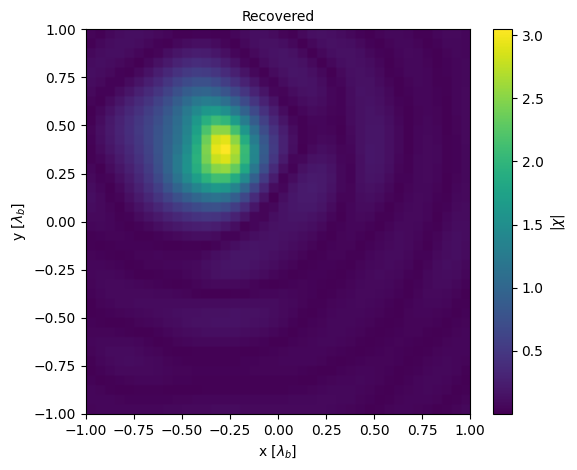

In [57]:
import som
import stopcriteria as stp
import richmond as ric

resolution = (40, 40)
discretization = ric.Richmond(configuration=config,
                              elements=resolution)

method = som.SubspaceBasedOptimizationMethod(
    stp.StopCriteria(max_iterations=30), cutoff_index=5
)

result = method.solve(test, discretization, print_info=True)

result.plot_map(show=True)

Method: Orthogonality Sampling Method
Alias: osm
Input Data: star4.ipt
Discretization: Richmond Method (40x40)
Threshold: 0.35


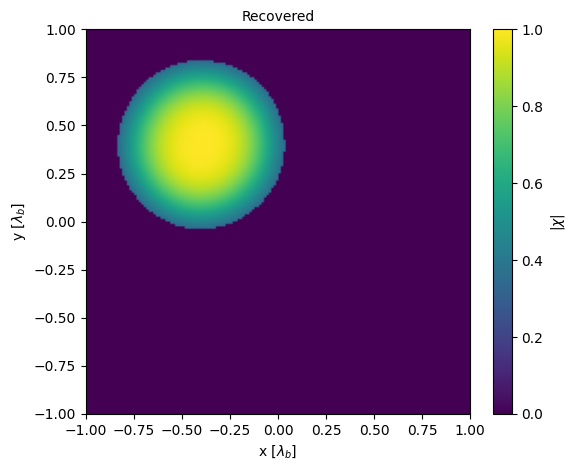

In [58]:
import osm
method = osm.OrthogonalitySamplingMethod(threshold=.35)
result = method.solve(test, discretization, print_info=True)
result.plot_map(show=True)

Method: 
Alias: ca
Input Data: single.ipt
Discretization: Richmond Method (40x40)
Parallelization: False
Number of executions: 1
Output rule: each
Position range: None
Radius range: None
Contrast range: [0.1, 10.0]
--------------------------------------------------
Execution: 0
Iteration: 1 - f(x): 83.64439739330719
Iteration: 2 - f(x): 83.64439739330719
Iteration: 3 - f(x): 65.68610394698291
Iteration: 4 - f(x): 65.68610394698291
Iteration: 5 - f(x): 62.47993888302762
Iteration: 6 - f(x): 62.47993888302762
Iteration: 7 - f(x): 54.455943934741676
Iteration: 8 - f(x): 54.455943934741676
Iteration: 9 - f(x): 42.77364240035869
Iteration: 10 - f(x): 42.77364240035869


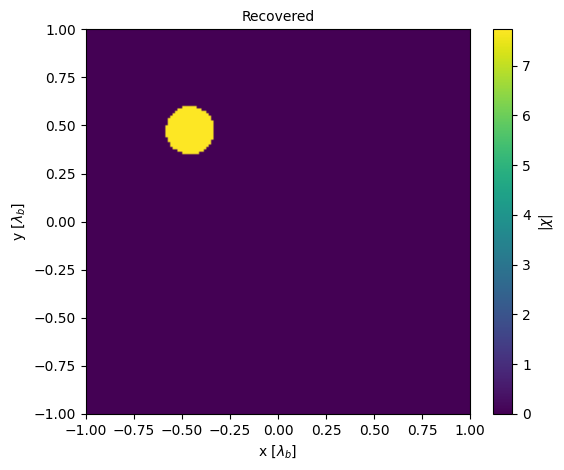

In [2]:
import circleapproximation as ca
import stochastic as stc

import richmond as ric

resolution = (40, 40)
discretization = ric.Richmond(configuration=config,
                              elements=resolution)

contrast_range = (0.1, 10.)

method = ca.CircleApproximation(stc.OutputMode(stc.EACH_EXECUTION),
                                number_executions=1,
                                contrast_range=contrast_range,
                                solver="de")

result = method.solve(test, discretization, print_info=True)
result.plot_map(show=True)
